In [9]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

print(f'pymc version: {pm.__version__}')

%matplotlib inline

pymc version: 3.7


In [2]:
np.random.seed(42)

In [3]:
alpha = 1
sigma = 1
beta = [1, 2.5]

In [4]:
# size of dataset
size = 100

In [5]:
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

In [6]:
# simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [12]:
def display_plot(X1, X2, Y):
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
    axes[0].scatter(X1, Y)
    axes[0].set_ylabel('Y')
    axes[0].set_xlabel('X1')

    axes[1].scatter(X2, Y)
    axes[1].set_xlabel('X2')

    plt.show()

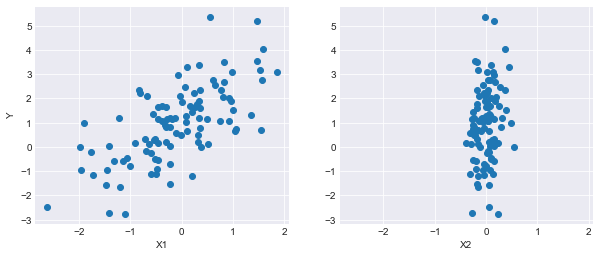

In [13]:
display_plot(X1, X2, Y)

In [16]:
model = pm.Model()

with model:
    # prior for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    # likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

In [17]:
Y_obs

Y_obs

In [18]:
model

In [19]:
map_estimate = pm.find_MAP(model=model)

/Users/kyohei.watarai/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -158.86, ||grad|| = 15.825: 100%|██████████| 19/19 [00:00<00:00, 677.90it/s]  


In [20]:
map_estimate

{'alpha': array(1.08852071),
 'beta': array([1.22568625, 2.43088392]),
 'sigma_log__': array(0.05177042),
 'sigma': array(1.05313394)}